In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

In [6]:
n_samples=100

In [11]:
datasets = [
    make_moons(n_samples=n_samples,noise=0.2,random_state=0),
    make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=0),
    make_blobs(n_samples=n_samples,centers=2,random_state=5),
    make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0,random_state=0)
]

In [13]:
kernel=['linear']

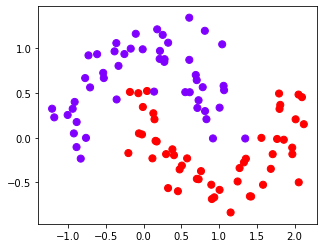

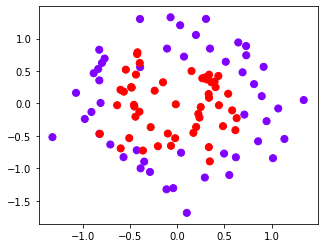

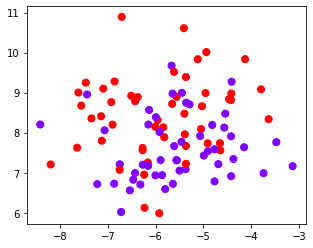

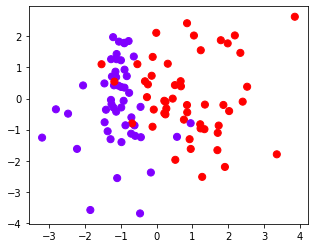

In [28]:
# 绘制四个数据集的样子
for x,y in datasets:
    plt.figure(figsize=(5,4))
    # 一共有两个特征第一个特征是x坐标，第二个特征是y坐标，每个点对应的颜色使用y
    plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")

In [31]:
nrows = len(datasets)
ncols = len(datasets)+1

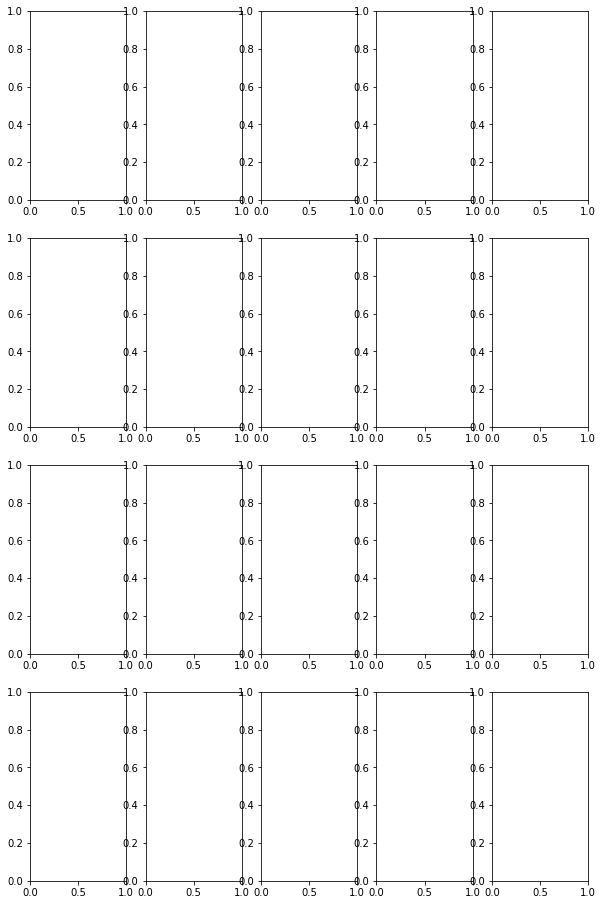

In [32]:
fig,axes = plt.subplots(nrows,ncols,figsize=(10,16))

# 第一层循环，在不同的数据集上进行循环
for ds_cnt, (x,y) in enumerate(datasets):
    ax = axes[ds_cnt,0]
    if ds_cnt == 0:
        ax.set_title("input data")
        ax.scatter(x[:,0],x[:,1],c=y,zorder=10,cmap=plt.cm.Paired,edgecolor='k')
        ax.set_xticks(())
        ax.set_yticks(())
        
        for est_idx,kernel in enumerate(kernel):
            # 索引的第一个数字是所在的列，也就是当前的数据集，第二个字是所在的行，也就是当前所用的kernel
            ax = axes[ds_cnt,est_idx+1]
            
            clf = svm.SVC(kernel=kernel, gamma=2).fit(x,y)
            score = clf.score(x,y)
            
            ax.scatter(x[:,0],x[:,1],c=y,zorder=10)